In [1]:
import opendatasets as od
#import zipfile
import requests
import pandas as pd
import seaborn as sns
import ast
#import wptools as wiki

## After uncomment and run cell below, do not run again

In [2]:
od.download('https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  jarrodmm


Your Kaggle Key:

  ········


100%|███████████████████████████████████████████████████████████████████████████████| 228M/228M [01:01<00:00, 3.91MB/s]


In [3]:
# Directory string for where all the csv data is located
moviedir = './the-movies-dataset/'

In [4]:
movies_metadata_df = pd.read_csv(moviedir+'movies_metadata.csv')

C:\Users\dakers\AppData\Local\Temp\ipykernel_7800\3185108381.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata_df = pd.read_csv(moviedir+'movies_metadata.csv')


In [14]:
movies_metadata_df.shape

(45466, 24)

In [15]:
movies_metadata_df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [ ]:
movies_metadata_df.columns

In [ ]:
# Printing each data type
display(movies_metadata_df.dtypes)

In [ ]:
movies_metadata_df.adult.value_counts()

In [ ]:
movies_metadata_df = movies_metadata_df[movies_metadata_df.adult == 'False']

In [ ]:
# Dropping movies with adult label
# movies_metadata_df.drop('adult', axis=1, inplace=True)

In [ ]:
movies_metadata_df.belongs_to_collection.value_counts().sum()

In [ ]:
movies_metadata_df.head(2)

In [ ]:
len(movies_metadata_df[['poster_path', 'spoken_languages']])

In [ ]:
# this cell takes string literal list and converts it to regular Python list

stringtest = movies_metadata_df['spoken_languages'][19729]

print(stringtest)

In [ ]:
languages_list = []
for rowindx, (indx, values) in enumerate(movies_metadata_df['spoken_languages'].iteritems()):
    print(rowindx, values, len(values))
    #languages_list.append(ast.literal_eval(values)[0].get('name'))
#languages_list[0]

In [ ]:
type(ast.literal_eval(movies_metadata_df['spoken_languages'][1]))

In [ ]:
# language_list = [x[0].get('name') if type(isinstance(x,list)) else 'English' for x in ast.literal_eval(movies_metadata_df['spoken_languages'])]
# language_list

In [ ]:
movies_metadata_df.drop(['adult', 'belongs_to_collection'], axis=1, inplace=True)

<AxesSubplot: xlabel='budget', ylabel='Count'>

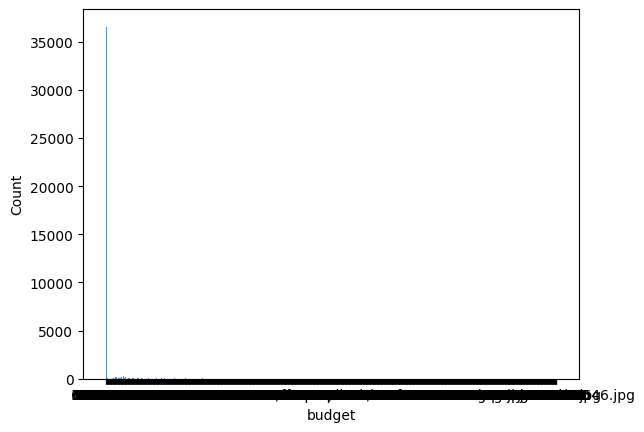

In [16]:
sns.histplot(movies_metadata_df.budget)

In [17]:
movies_metadata_df.budget.value_counts()

0           36573
5000000       286
10000000      259
20000000      243
2000000       242
            ...  
923             1
72500000        1
2160000         1
4439832         1
1254040         1
Name: budget, Length: 1226, dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)
no_budget_df = movies_metadata_df[movies_metadata_df['budget'] == '0']
no_budget_df.head(50)

In [ ]:
# %%time
# budget={}
# for idx, data in no_budget_df.iterrows(): 
#     so = wiki.page(data.original_title, silent=True).get_parse().data['infobox']
#     if so.has_key('budget'):
    
    
#     if not idx%100:
#         break

In [ ]:
# wiki.page('Grumpier Old Men', silent=True).get_parse().data['infobox']['budget']

In [ ]:
# clean_df = movies_metadata_df.loc[movies_metadata_df.budget != '0']

In [ ]:
# clean_df.shape

In [ ]:
movies_metadata_df[movies_metadata_df.revenue != 0].revenue.value_counts()